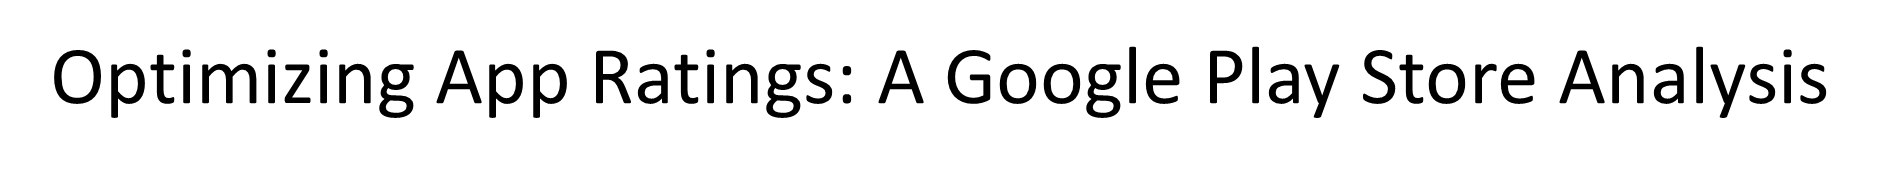
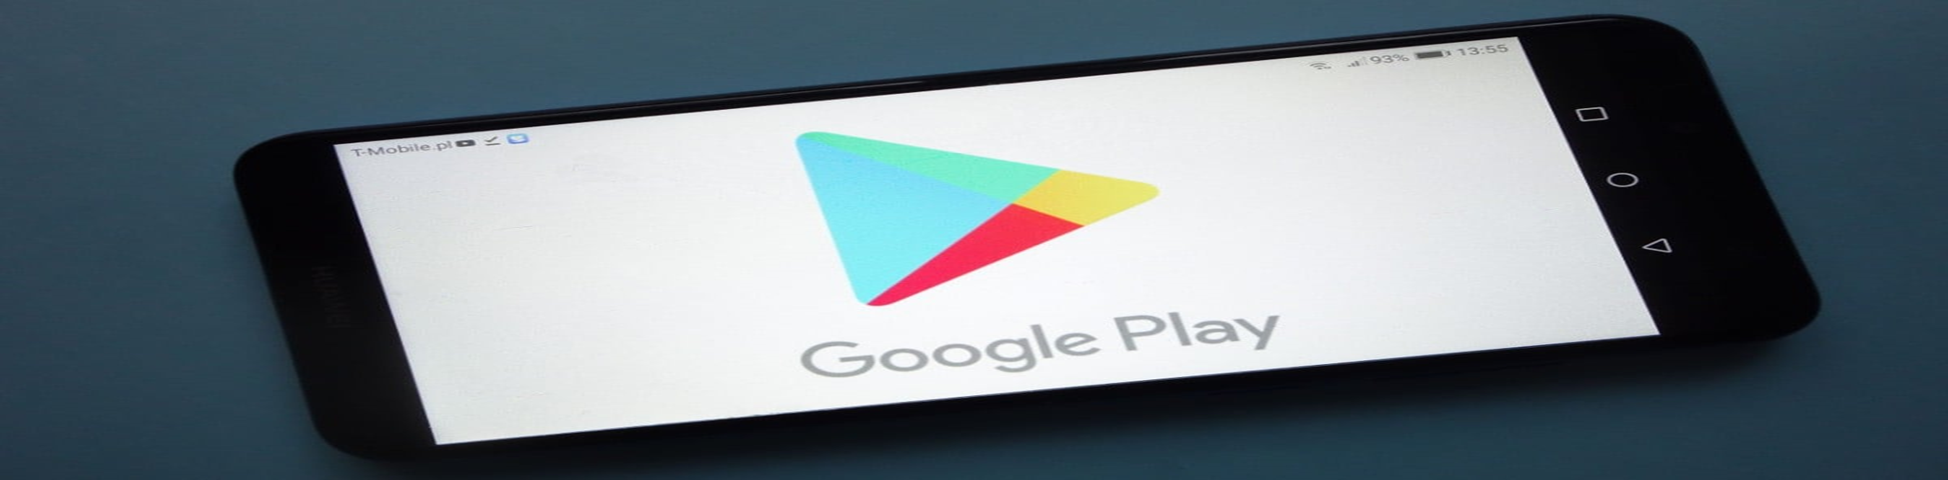
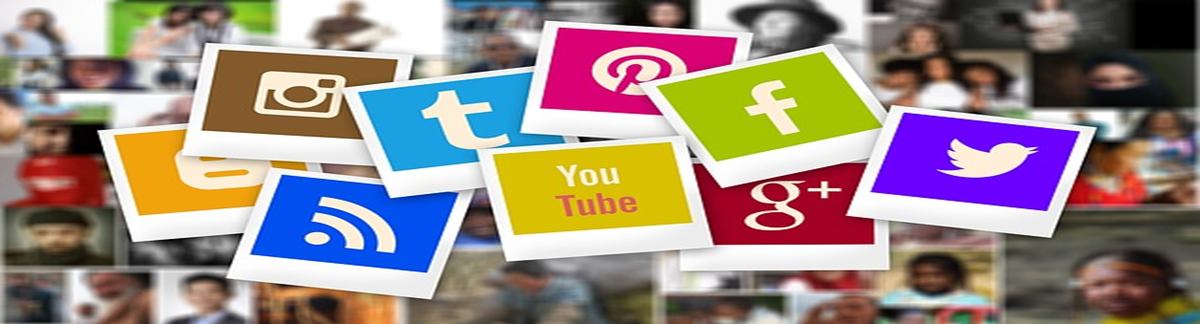

# Jahnavi Thandu


# Description of columns

**App :** The name of the app

**Category :** The category of the app

**Rating :** The rating of the app in the Play Store

**Reviews :** The number of reviews of the app

**Size :** The size of the app

**Install :** The number of installs of the app

**Type :** The type of the app (Free/Paid)

**Price :** The price of the app (0 if it is Free)

**Content Rating :** The appropiate target audience of the app

**Genres:** The genre of the app

**Last Updated :** The date when the app was last updated

**Current Ver :** The current version of the app

**Android Ver :** The minimum Android version required to run the app

# Step 1 - Setup and Initialization

## Importing Necessary Libraries

In [1]:
# Data
import numpy as np
import pandas as pd
from collections import defaultdict

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from wordcloud import WordCloud

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Hide warnings
import warnings
warnings.filterwarnings('ignore')


## Loading the Dataset

In [4]:
df = pd.read_csv("googleplaystore.csv")

# Step 2 - Initial Data Analysis

## Dataset Overview

In [5]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [6]:
df.shape

(10841, 13)

In [7]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [8]:
df.describe()

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


## Handling Data Types

**As most of the features are set to data type object and have suffixes, each feature's data type must be converted into a suitable format for analysis.**

### Reviews

In [10]:
df[~df.Reviews.str.isnumeric()]

App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN

We could have converted it into integer like we did for Size but the data for this App looks different. It can be noticed that the entries are entered wrong We could fix it by setting Category as nan and shifting all the values, but deleting the sample for now.

In [11]:
df=df.drop(df.index[10472])

**The feature Reviews must be of integer type.**

In [12]:
df["Reviews"] = df["Reviews"].astype(int)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int32(1), object(11)
memory usage: 1.1+ MB


Size

In [14]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Removing all characters from size and convert it to float.

In [15]:
df['Size']=df['Size'].str.replace('M','000')
df['Size']=df['Size'].str.replace('k','')
#apps['size']=apps['size'].str.replace('.','')
df['Size']=df['Size'].replace("Varies with device",np.nan)
df['Size']=df['Size'].astype('float')
df['Size']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size, Length: 10840, dtype: float64

There is a problem! There are some applications size in megabyte and some in kilobyte.

In [16]:
###### Convert mega to kilo then convert all to mega
for i in df['Size']:
    if i < 10:
        df['Size']=df['Size'].replace(i,i*1000)
df['Size']=df['Size']/1000
df['Size']

0        19.0
1        14.0
2         8.7
3        25.0
4         2.8
         ... 
10836    53.0
10837     3.6
10838     9.5
10839     NaN
10840    19.0
Name: Size, Length: 10840, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), int32(1), object(10)
memory usage: 1.1+ MB


### Installs and Price

In [18]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [19]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [20]:
items_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in items_to_remove:
    for col in cols_to_clean:
        df[col]=df[col].str.replace(item,'')
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type Price Content Rating  \
0      159  19.0     10000  Free     0       Everyone   
1      967  14.0    500000  Free     0       Everyone   
2    87510   8.7   5000000  Free     0       Everyone   
3   215644  25.0  50000000  Free     0           Teen   
4      967   2.8    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [21]:
df.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [22]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [23]:
df[df['Price']=='Everyone']

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []

In [24]:
df['Installs']=df['Installs'].astype('int')
df['Price']=df['Price'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.1+ MB


### last updated

   
* Updating the Last Updated column's datatype from string to pandas datetime.

* Extracting new columns Updated Year, Updated Month and updated day.

In [25]:
#Changing Last update into a datetime column
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [26]:
df['Updated_Month']=df['Last Updated'].dt.month
df['Updated_Year']=df['Last Updated'].dt.year

In [27]:
df.drop('Last Updated', axis=1, inplace=True)

In [28]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type  Price Content Rating  \
0      159  19.0     10000  Free    0.0       Everyone   
1      967  14.0    500000  Free    0.0       Everyone   
2    87510   8.7   5000000  Free    0.0       Everyone   
3   215644  25.0  50000000  Free    0.0           Teen   
4      967   2.8    100000  Free    0.0       Everyone   

                      Genres         Current Ver   Android Ver  Updated_Month  \
0               Art & Design               1.0.0  4.0.3 and up              1   
1  Art & Design;Pretend Play               2.0.0  4.0.3 and up              1   
2               Art & Design               1.2.4  4.0.3 and up              8   
3               Art & Design  Varies with device    4.2 and up              6   
4    Art & Design;Creativity                 1.1    4.4 and up              6   

   Updated_Year  
0          2018  
1          2018  
2          2018  
3          2018  
4          2018

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int32  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(4), object(7)
memory usage: 1.1+ MB


## Data cleaning

### Finding null values

In [30]:
null = pd.DataFrame({'Null Values' : df.isna().sum().sort_values(ascending=False), 'Percentage Null Values' : (df.isna().sum().sort_values(ascending=False)) / (df.shape[0]) * (100)})
null

Null Values  Percentage Null Values
Size                   1695               15.636531
Rating                 1474               13.597786
Current Ver               8                0.073801
Android Ver               2                0.018450
Type                      1                0.009225
App                       0                0.000000
Category                  0                0.000000
Reviews                   0                0.000000
Installs                  0                0.000000
Price                     0                0.000000
Content Rating            0                0.000000
Genres                    0                0.000000
Updated_Month             0                0.000000
Updated_Year              0                0.000000

<BarContainer object of 14 artists>

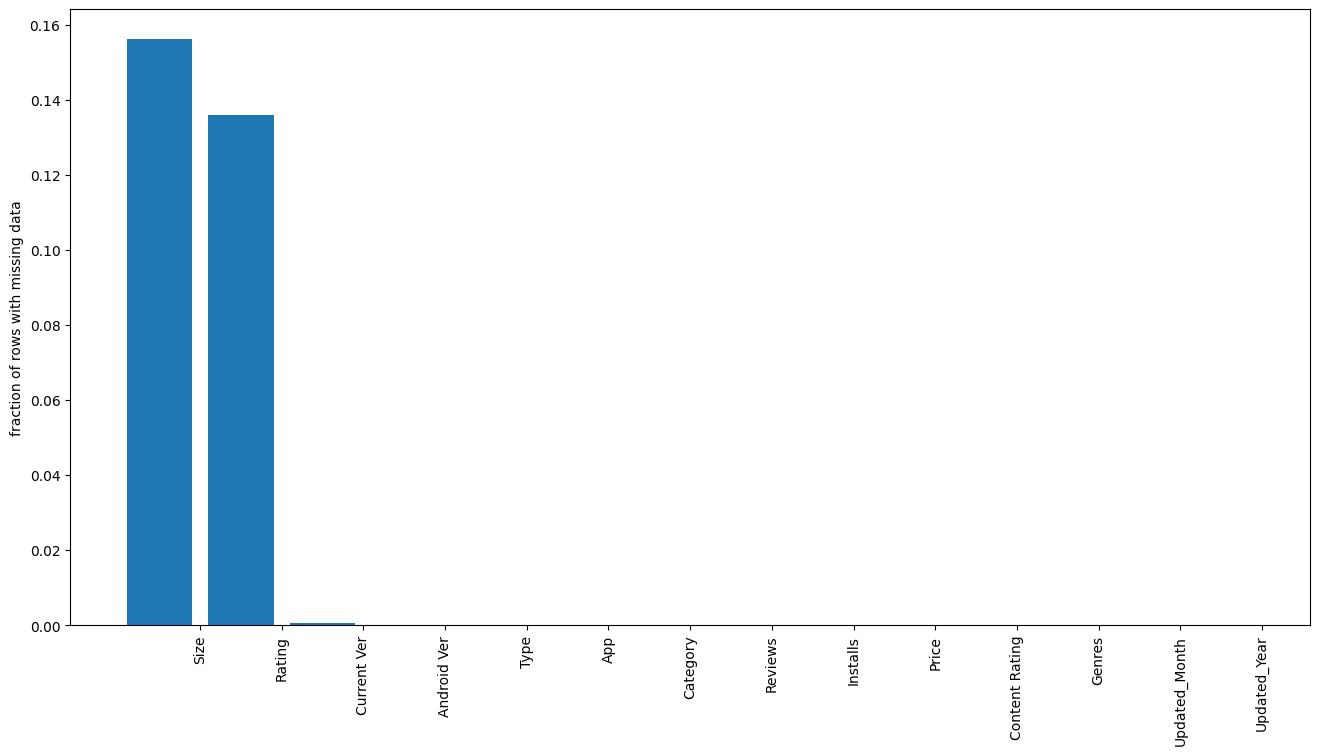

In [31]:
null_counts = df.isna().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel('fraction of rows with missing data')
plt.bar(np.arange(len(null_counts)),null_counts)

**We have missing values in Rating, Type, Content Rating, Current Ver and Android Ver.**

### Handling missing values

In [32]:
def impute_median(series):
    return series.fillna(series.median())

# Impute missing values in 'Rating' and 'Size' columns with median
df['Rating'] = df['Rating'].transform(impute_median)
df['Size'] = df['Size'].transform(impute_median)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int32  
 4   Size            10840 non-null  float64
 5   Installs        10840 non-null  int32  
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Updated_Month   10840 non-null  int32  
 13  Updated_Year    10840 non-null  int32  
dtypes: float64(3), int32(4), object(7)
memory usage: 1.1+ MB


In [34]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Current Ver       8
Android Ver       2
Updated_Month     0
Updated_Year      0
dtype: int64

In [35]:
# Fill missing values in 'Type', 'Current Ver', and 'Android Ver' columns
df['Type'].fillna(str(df['Type'].mode().values[0]), inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode().values[0], inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode().values[0], inplace=True)

In [36]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Current Ver       0
Android Ver       0
Updated_Month     0
Updated_Year      0
dtype: int64

### Deleting duplicated data

In [37]:
duplicate = df.duplicated()
print(duplicate.sum())

484


In [38]:
df.drop_duplicates(inplace=True)

In [39]:
duplicate = df.duplicated()
print(duplicate.sum())

0


### Extracting Numerical and categorical features

In [40]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_features

['Rating',
 'Reviews',
 'Size',
 'Installs',
 'Price',
 'Updated_Month',
 'Updated_Year']

In [41]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

### Checking outliers

<Axes: ylabel='Rating'>

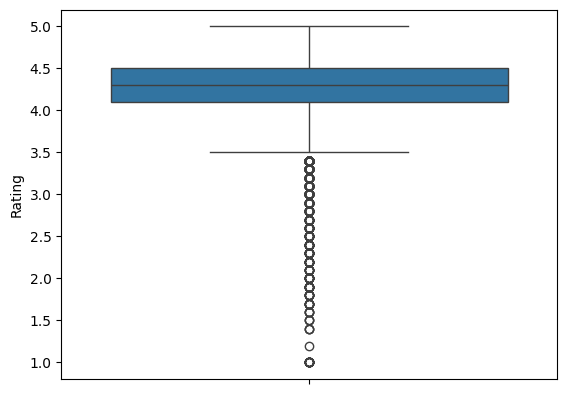

In [42]:
sns.boxplot(df["Rating"])

<Axes: ylabel='Reviews'>

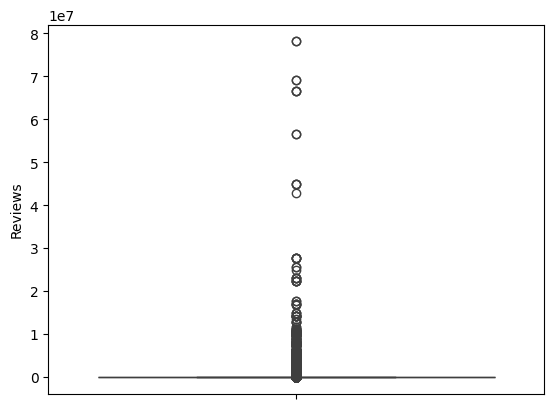

In [43]:
sns.boxplot(df["Reviews"])

<Axes: ylabel='Size'>

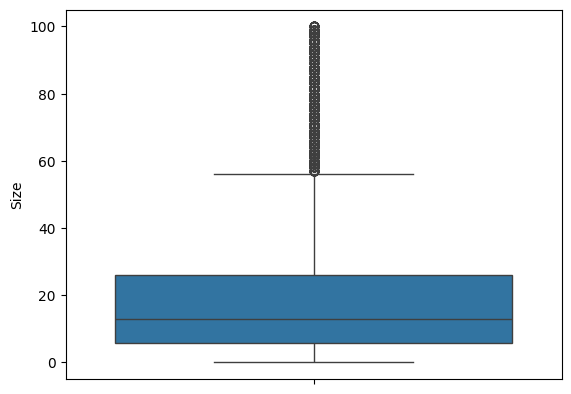

In [44]:
sns.boxplot(df["Size"])


<Axes: ylabel='Installs'>

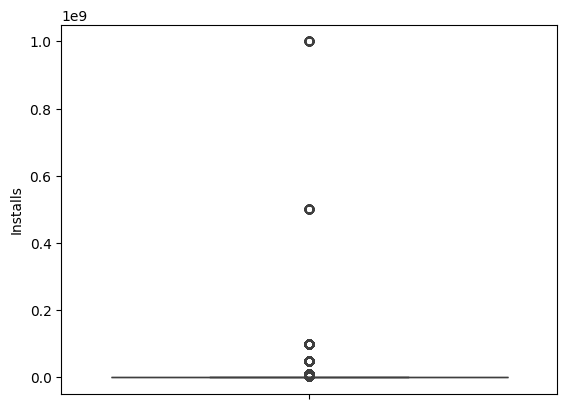

In [45]:
sns.boxplot(df["Installs"])

<Axes: ylabel='Price'>

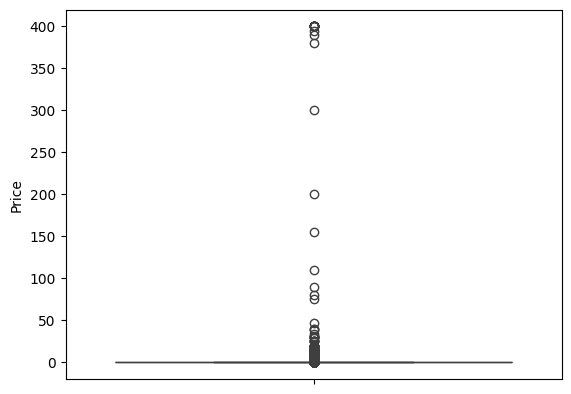

In [46]:
sns.boxplot(df["Price"])

<Axes: ylabel='Updated_Month'>

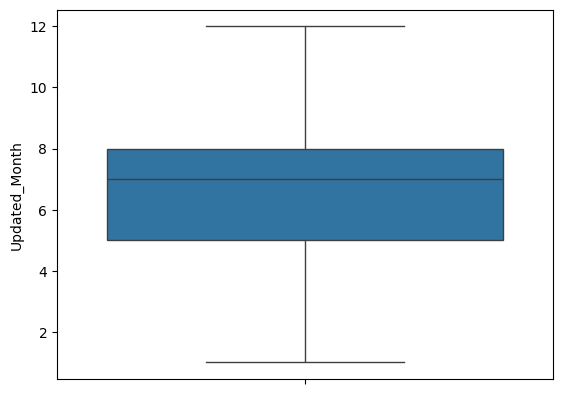

In [47]:
sns.boxplot(df["Updated_Month"])

<Axes: ylabel='Updated_Year'>

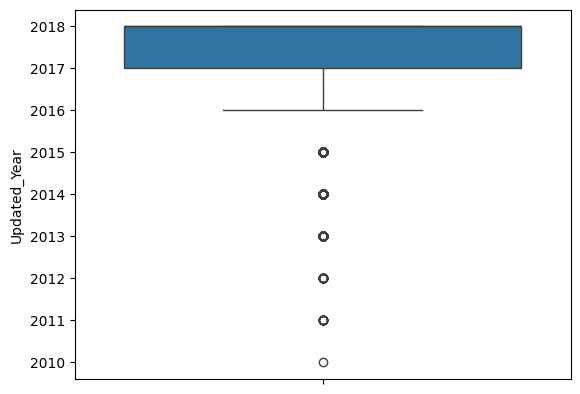

In [48]:
sns.boxplot(df["Updated_Year"])

In [49]:
# Calculate IQR for each column
Q1_rating = df['Rating'].quantile(0.25)
Q3_rating = df['Rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating
lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating
outliers_rating = df[(df['Rating'] < lower_bound_rating) | (df['Rating'] > upper_bound_rating)]

In [50]:
Q1_reviews = df['Reviews'].quantile(0.25)
Q3_reviews = df['Reviews'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews
lower_bound_reviews = Q1_reviews - 1.5 * IQR_reviews
upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews
outliers_reviews = df[(df['Reviews'] < lower_bound_reviews) | (df['Reviews'] > upper_bound_reviews)]

In [51]:
Q1_size = df['Size'].quantile(0.25)
Q3_size = df['Size'].quantile(0.75)
IQR_size = Q3_size - Q1_size
lower_bound_size = Q1_size - 1.5 * IQR_size
upper_bound_size = Q3_size + 1.5 * IQR_size
outliers_size = df[(df['Size'] < lower_bound_size) | (df['Size'] > upper_bound_size)]

In [52]:
Q1_installs = df['Installs'].quantile(0.25)
Q3_installs = df['Installs'].quantile(0.75)
IQR_installs = Q3_installs - Q1_installs
lower_bound_installs = Q1_installs - 1.5 * IQR_installs
upper_bound_installs = Q3_installs + 1.5 * IQR_installs
outliers_installs = df[(df['Installs'] < lower_bound_installs) | (df['Installs'] > upper_bound_installs)]


In [53]:
Q1_price = df['Price'].quantile(0.25)
Q3_price = df['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price
outliers_price = df[(df['Price'] < lower_bound_price) | (df['Price'] > upper_bound_price)]


In [54]:
Q1_month = df['Updated_Month'].quantile(0.25)
Q3_month = df['Updated_Month'].quantile(0.75)
IQR_month = Q3_month - Q1_month
lower_bound_month = Q1_month - 1.5 * IQR_month
upper_bound_month = Q3_month + 1.5 * IQR_month
outliers_month = df[(df['Updated_Month'] < lower_bound_month) | (df['Updated_Month'] > upper_bound_month)]


In [55]:
Q1_year = df['Updated_Year'].quantile(0.25)
Q3_year = df['Updated_Year'].quantile(0.75)
IQR_year = Q3_year - Q1_year
lower_bound_year = Q1_year - 1.5 * IQR_year
upper_bound_year = Q3_year + 1.5 * IQR_year
outliers_year = df[(df['Updated_Year'] < lower_bound_year) | (df['Updated_Year'] > upper_bound_year)]


In [56]:
# Concatenate all outliers
all_outliers = pd.concat([outliers_rating, outliers_reviews, outliers_size,
                          outliers_installs, outliers_price, outliers_month, outliers_year])


In [57]:
# View outliers for all columns
print("Outliers in all columns:")
print(all_outliers)

Outliers in all columns:
                                   App             Category  Rating  Reviews  \
15     Learn To Draw Kawaii Characters       ART_AND_DESIGN     3.2       55   
87       RST - Sale of cars on the PCT    AUTO_AND_VEHICLES     3.2      250   
159                     Cloud of Books  BOOKS_AND_REFERENCE     3.3     1862   
176                   Free Book Reader  BOOKS_AND_REFERENCE     3.4     1680   
209                    Plugin:AOT v5.0             BUSINESS     3.1     4034   
...                                ...                  ...     ...      ...   
10817             HTC Sense Input - FR                TOOLS     4.0      885   
10830                News Minecraft.fr   NEWS_AND_MAGAZINES     3.8      881   
10832                         FR Tides              WEATHER     3.8     1195   
10833                      Chemin (fr)  BOOKS_AND_REFERENCE     4.8       44   
10839    The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE     4.5      114   

         Size 

In [58]:
# Assuming 'all_outliers' is the concatenated DataFrame
total_rows = len(df)
total_outliers = len(all_outliers)

# Calculate percentage of outliers
percentage_outliers = (total_outliers / total_rows) * 100

print(f"Percentage of outliers in the concatenated dataset: {percentage_outliers:.2f}%")

Percentage of outliers in the concatenated dataset: 73.01%


In [59]:
# Identify and handle outliers
df_no_outliers = df[
    (df['Rating'] >= lower_bound_rating) & (df['Rating'] <= upper_bound_rating) &
    (df['Reviews'] >= lower_bound_reviews) & (df['Reviews'] <= upper_bound_reviews) &
    (df['Size'] >= lower_bound_size) & (df['Size'] <= upper_bound_size) &
    (df['Installs'] >= lower_bound_installs) & (df['Installs'] <= upper_bound_installs) &
    (df['Price'] >= lower_bound_price) & (df['Price'] <= upper_bound_price) &
    (df['Updated_Month'] >= lower_bound_month) & (df['Updated_Month'] <= upper_bound_month) &
    (df['Updated_Year'] >= lower_bound_year) & (df['Updated_Year'] <= upper_bound_year)
]

In [60]:
print(df_no_outliers)

                                                  App        Category  Rating  \
0      Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                 Coloring book moana  ART_AND_DESIGN     3.9   
4               Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   
5                          Paper flowers instructions  ART_AND_DESIGN     4.4   
6             Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN     3.8   
...                                               ...             ...     ...   
10834                                   FR Calculator          FAMILY     4.0   
10835                                        FR Forms        BUSINESS     4.3   
10836                                Sya9a Maroc - FR          FAMILY     4.5   
10837                Fr. Mike Schmitz Audio Teachings          FAMILY     5.0   
10838                          Parkinson Exercices FR         MEDICAL     4.3   

       Reviews  Size  Insta

In [61]:
# Check outliers for Rating column in df_no_outliers
outliers_rating = df_no_outliers[
    (df_no_outliers['Rating'] < lower_bound_rating) | (df_no_outliers['Rating'] > upper_bound_rating)
]

In [62]:
# Print the outliers for Rating column
print("Outliers in Rating column:")
print(outliers_rating[['Rating']])


Outliers in Rating column:
Empty DataFrame
Columns: [Rating]
Index: []


In [63]:
# Check outliers for Reviews column in df_no_outliers
outliers_reviews = df_no_outliers[
    (df_no_outliers['Reviews'] < lower_bound_reviews) | (df_no_outliers['Reviews'] > upper_bound_reviews)
]

In [64]:
# Print the outliers for Reviews column
print("Outliers in Reviews column:")
print(outliers_reviews[['Reviews']])

Outliers in Reviews column:
Empty DataFrame
Columns: [Reviews]
Index: []


In [65]:
# Display descriptive statistics for numerical columns after removing outliers
print(df_no_outliers.describe())

            Rating        Reviews         Size        Installs   Price  \
count  5467.000000    5467.000000  5467.000000     5467.000000  5467.0   
mean      4.295811    6926.320834    14.655660   266178.044449     0.0   
std       0.324270   15542.957188    12.575657   400585.587536     0.0   
min       3.500000       0.000000     0.010000        0.000000     0.0   
25%       4.100000       9.000000     4.800000     1000.000000     0.0   
50%       4.300000     222.000000    12.000000    10000.000000     0.0   
75%       4.500000    5100.000000    21.000000   500000.000000     0.0   
max       5.000000  112565.000000    56.000000  1000000.000000     0.0   

       Updated_Month  Updated_Year  
count    5467.000000   5467.000000  
mean        6.156393   2017.585147  
std         2.707313      0.658074  
min         1.000000   2016.000000  
25%         4.000000   2017.000000  
50%         7.000000   2018.000000  
75%         8.000000   2018.000000  
max        12.000000   2018.000000  


# Step 5 | Exploratory Data Analysis (EDA)

## Category Column

In [66]:
df['Category'].value_counts()

Category
FAMILY                 1943
GAME                   1121
TOOLS                   842
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: count, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY

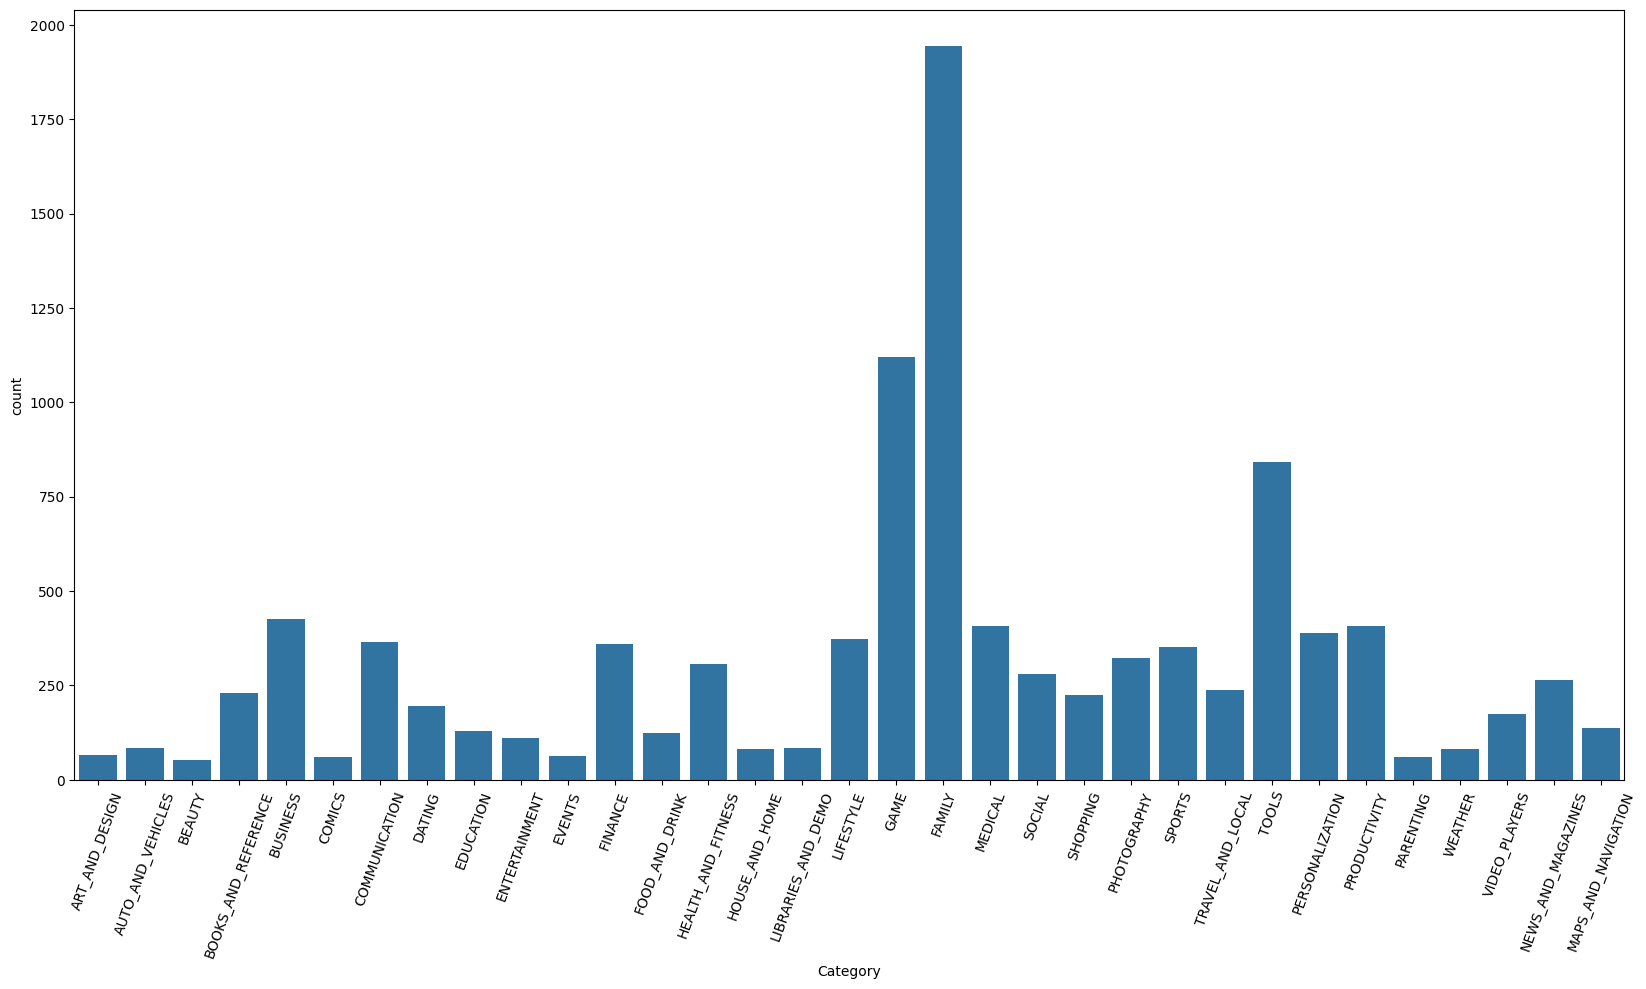

In [67]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Category',data=df)
plt.xticks(rotation=70)

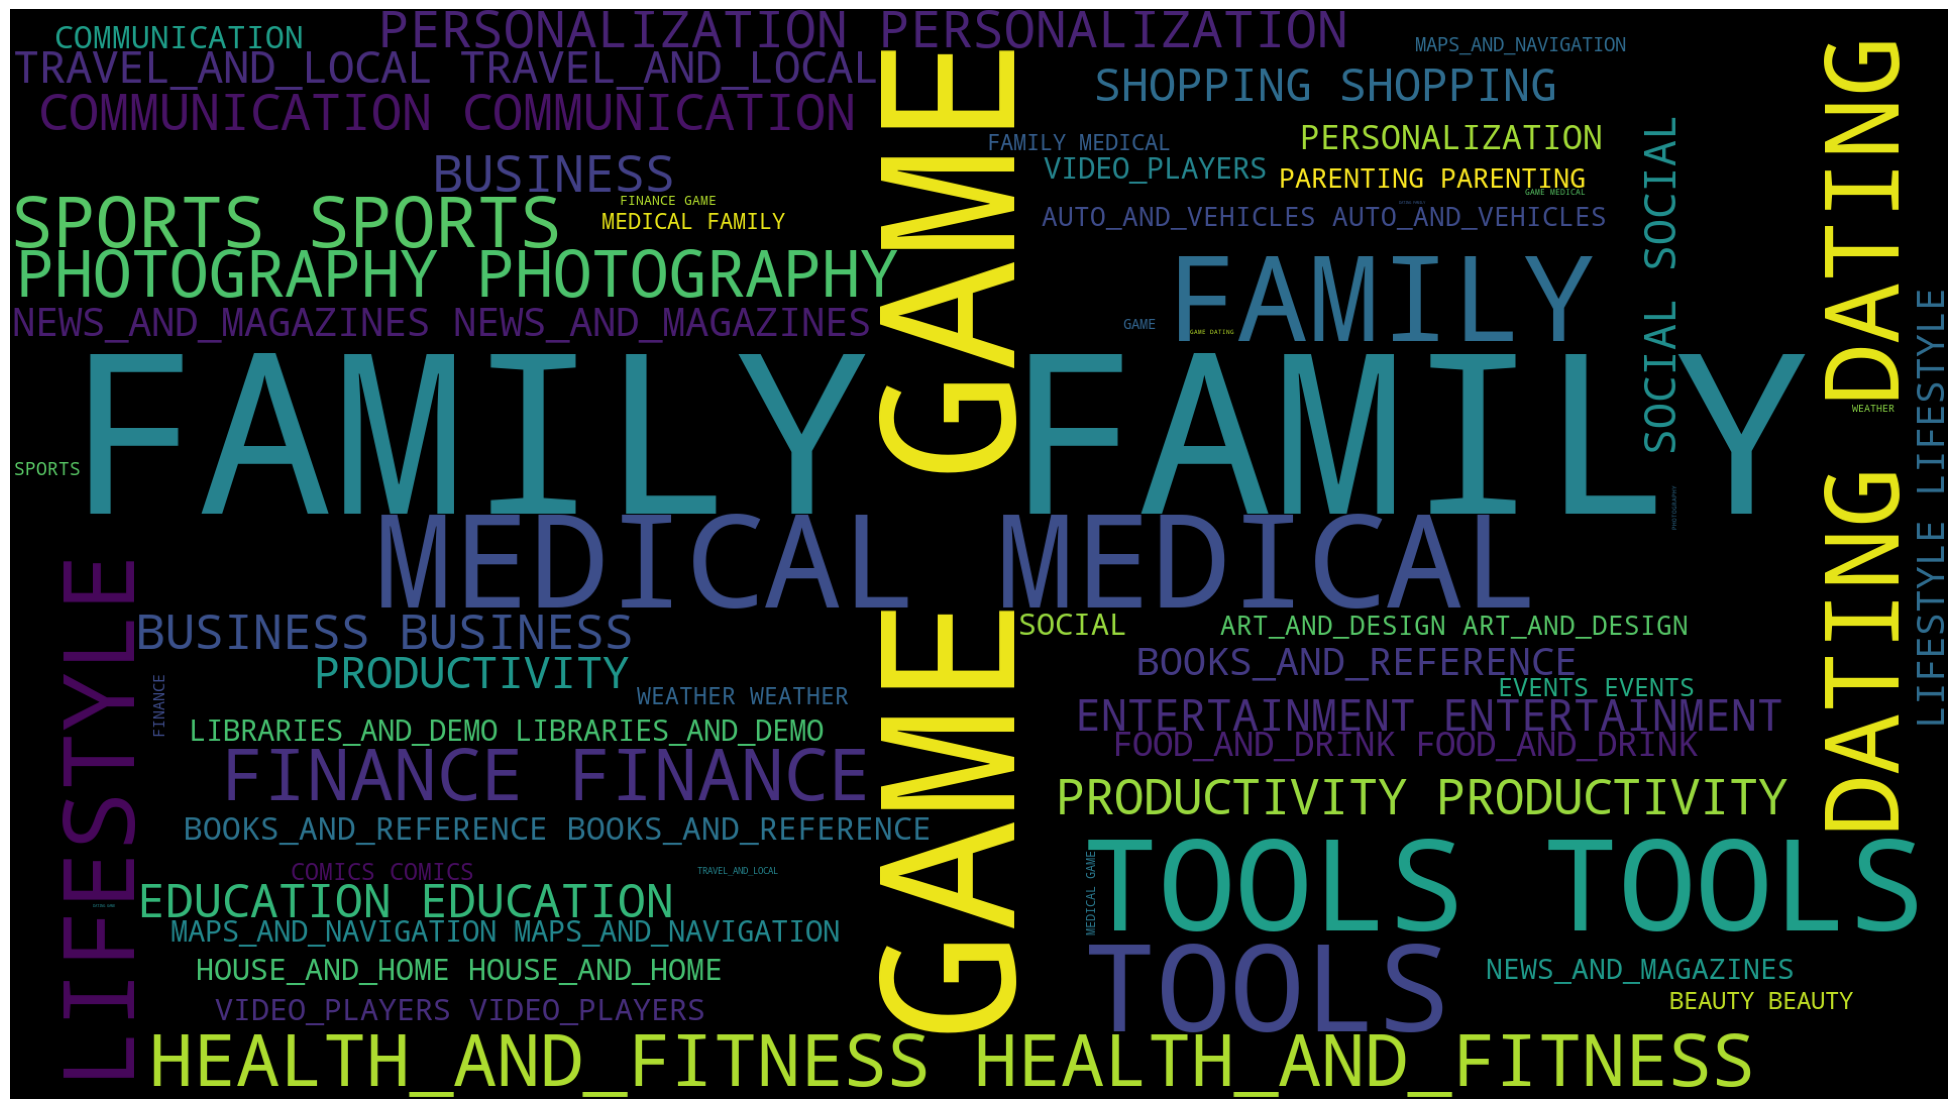

In [68]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.Category))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Category vs Rating Analysis

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'FAMILY'),
  Text(1, 0, 'HEALTH_AND_FITNESS'),
  Text(2, 0, 'SHOPPING'),
  Text(3, 0, 'LIFESTYLE'),
  Text(4, 0, 'TOOLS'),
  Text(5, 0, 'COMMUNICATION'),
  Text(6, 0, 'ART_AND_DESIGN'),
  Text(7, 0, 'COMICS'),
  Text(8, 0, 'PERSONALIZATION'),
  Text(9, 0, 'GAME'),
  Text(10, 0, 'MEDICAL'),
  Text(11, 0, 'BUSINESS'),
  Text(12, 0, 'PRODUCTIVITY'),
  Text(13, 0, 'NEWS_AND_MAGAZINES'),
  Text(14, 0, 'FINANCE'),
  Text(15, 0, 'SOCIAL'),
  Text(16, 0, 'PHOTOGRAPHY'),
  Text(17, 0, 'BOOKS_AND_REFERENCE'),
  Text(18, 0, 'SPORTS'),
  Text(19, 0, 'FOOD_AND_DRINK'),
  Text(20, 0, 'PARENTING'),
  Text(21, 0, 'EVENTS'),
  Text(22, 0, 'TRAVEL_AND_LOCAL'),
  Text(23, 0, 'DATING'),
  Text(24, 0, 'LIBRARIES_AND_DEMO'),
  Text(25, 0, 'MAPS_AND_NAVIGATION'),
  Text(26, 0, 'VIDEO_PLAYERS'),
  Text(27, 0, '

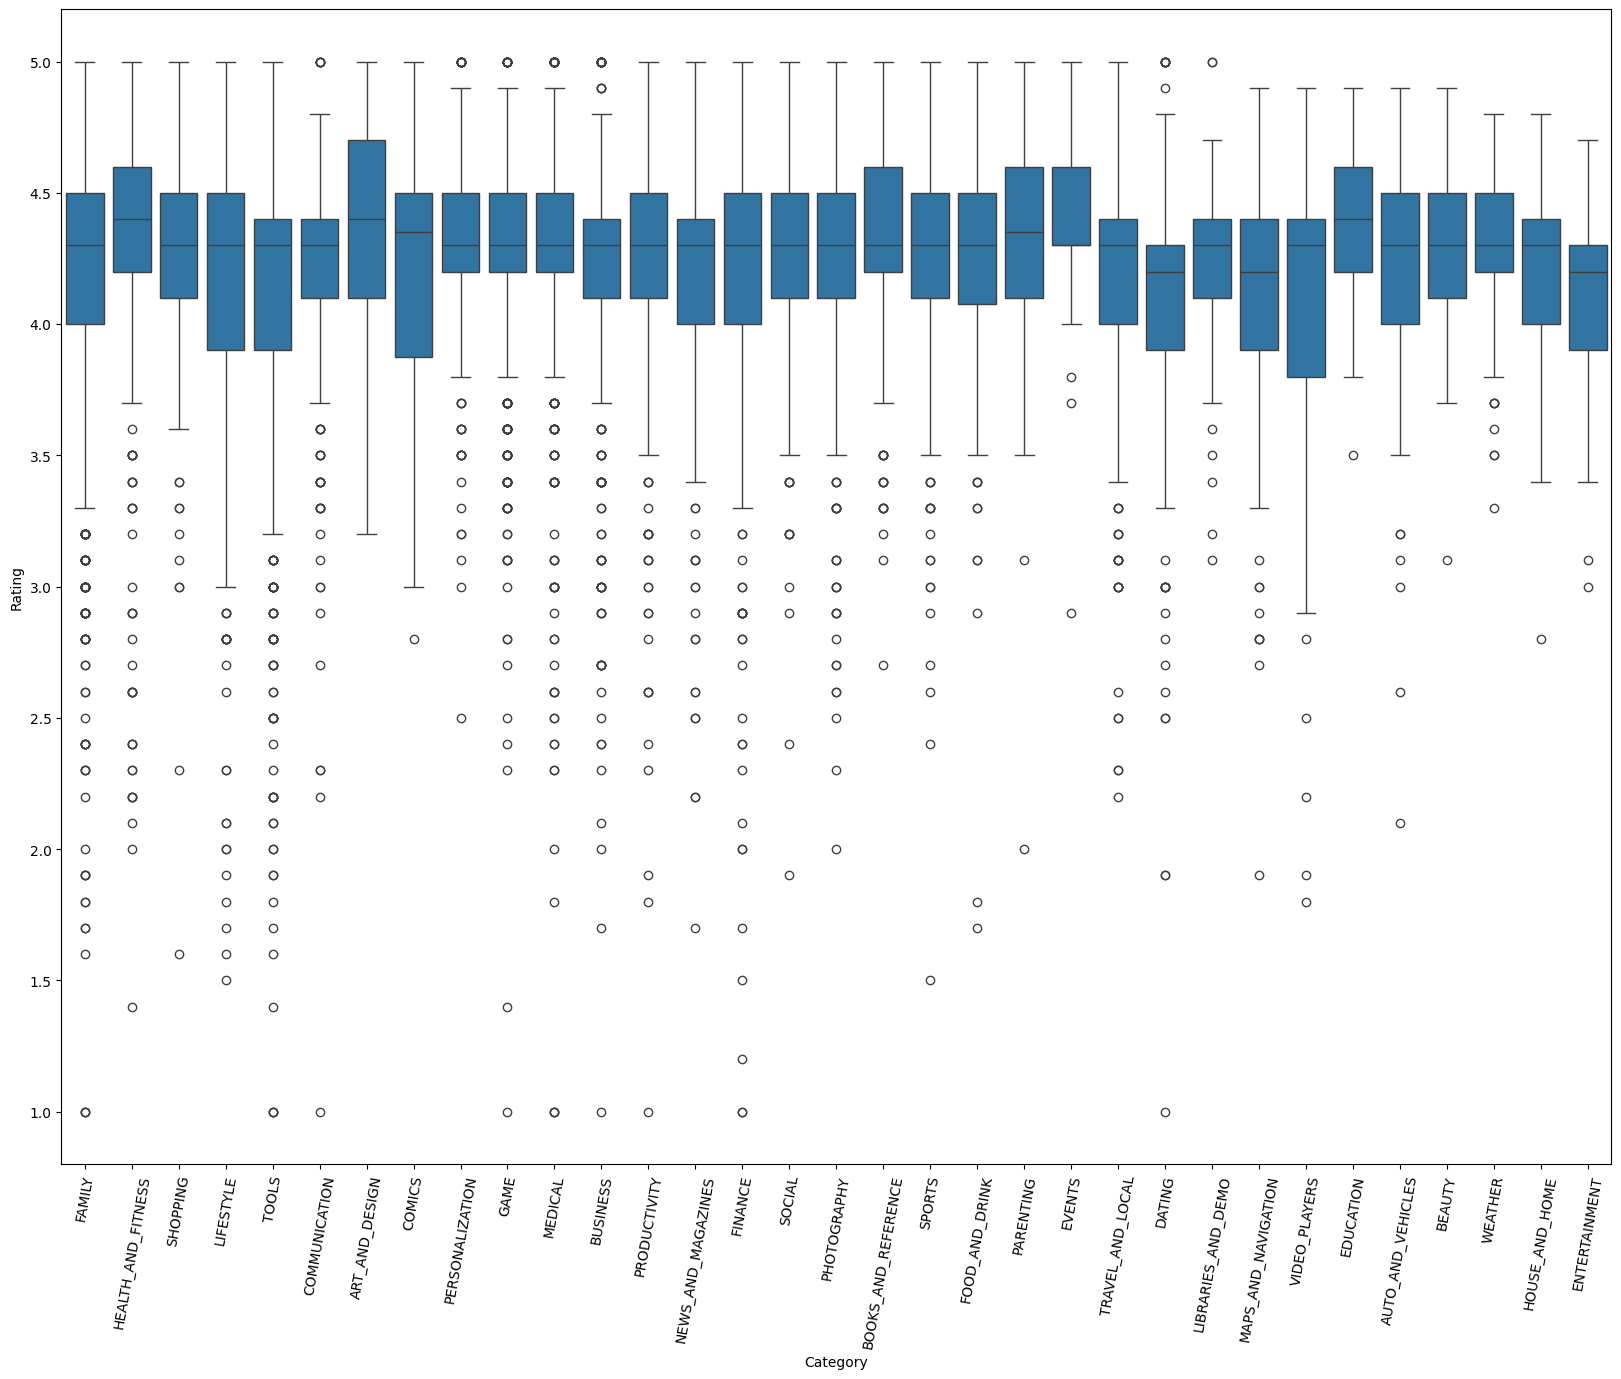

In [69]:
plt.figure(figsize=(20,15))
sns.boxplot(y='Rating',x='Category',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=80)

## Type Column

In [119]:
df['Type'].value_counts()

Type
Free    9591
Paid     765
Name: count, dtype: int64

([0, 1], [Text(0, 0, 'Free'), Text(1, 0, 'Paid')])

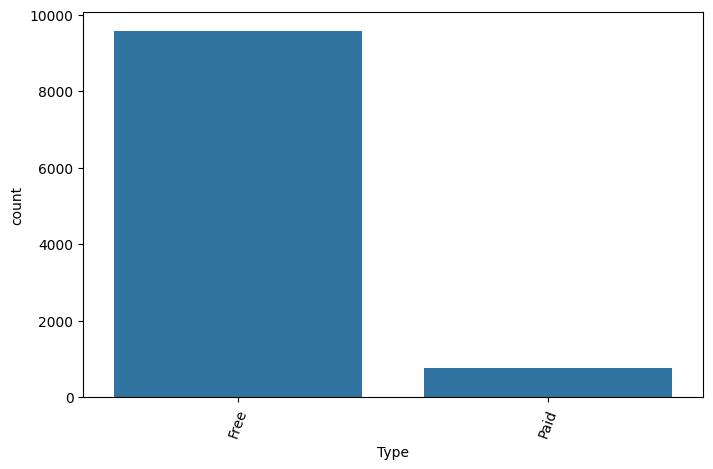

In [120]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=df)
plt.xticks(rotation=70)

<Axes: ylabel='count'>

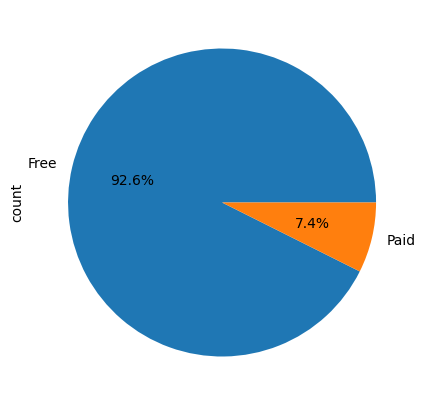

In [121]:
df["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

## Distribution of ratings

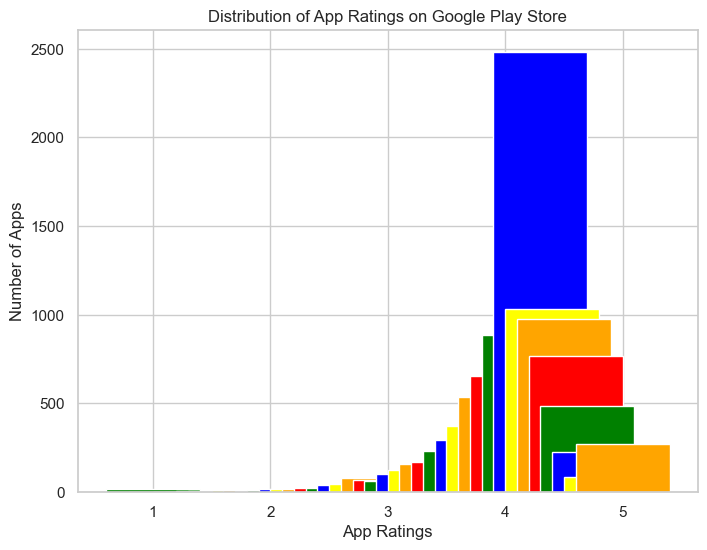

In [506]:
# Check the distribution of ratings
rating_distribution = df['Rating'].value_counts().sort_index()

# Bar Chart
plt.figure(figsize=(8, 6))
plt.bar(rating_distribution.index, rating_distribution.values, color=['green', 'blue', 'yellow', 'orange', 'red'])
plt.xlabel('App Ratings')
plt.ylabel('Number of Apps')
plt.title('Distribution of App Ratings on Google Play Store')
plt.show()


## Type vs Rating Analysis

<Figure size 1500x800 with 0 Axes>

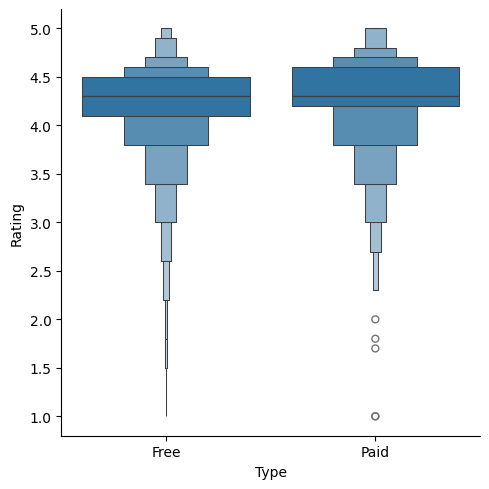

In [122]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = df.sort_values('Rating',ascending=False),kind='boxen')

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Content Rating Column

In [123]:
df['Content Rating'].value_counts()

Content Rating
Everyone           8381
Teen               1146
Mature 17+          447
Everyone 10+        377
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">

## Content Rating vs Rating Analysis

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Everyone'),
  Text(1, 0, 'Teen'),
  Text(2, 0, 'Mature 17+'),
  Text(3, 0, 'Everyone 10+'),
  Text(4, 0, 'Adults only 18+'),
  Text(5, 0, 'Unrated')])

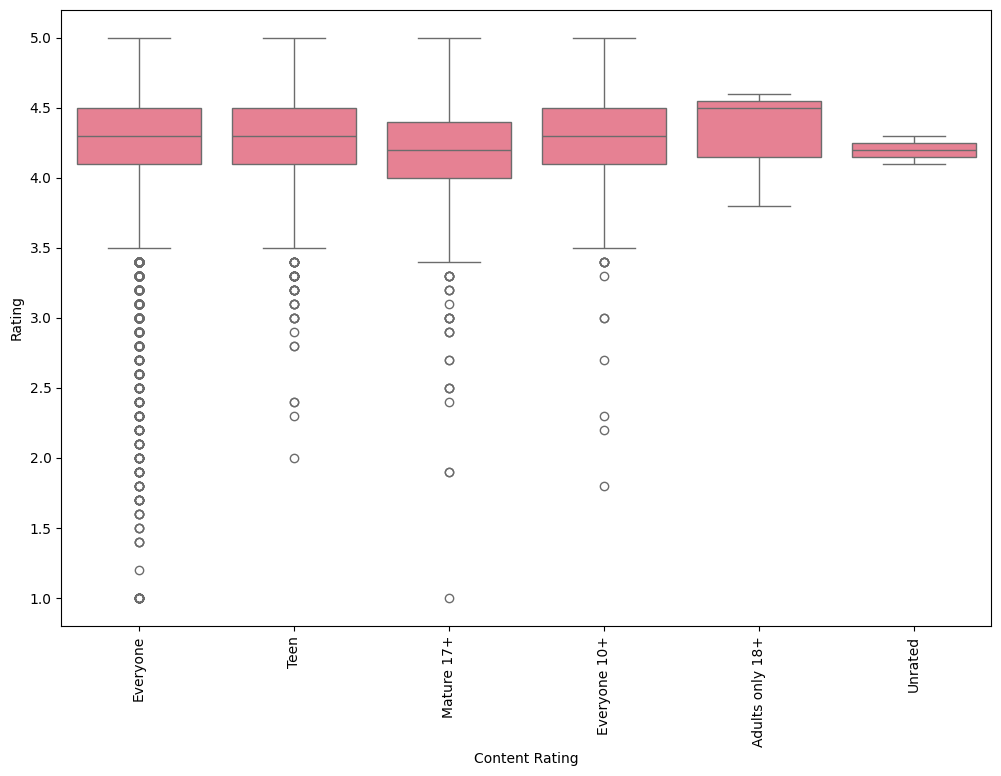

In [152]:
plt.figure(figsize=(12,8))
sns.boxplot(y='Rating',x='Content Rating',data = df.sort_values('Rating',ascending=False))
plt.xticks(rotation=90)

<Axes: xlabel='Content Rating', ylabel='Installs'>

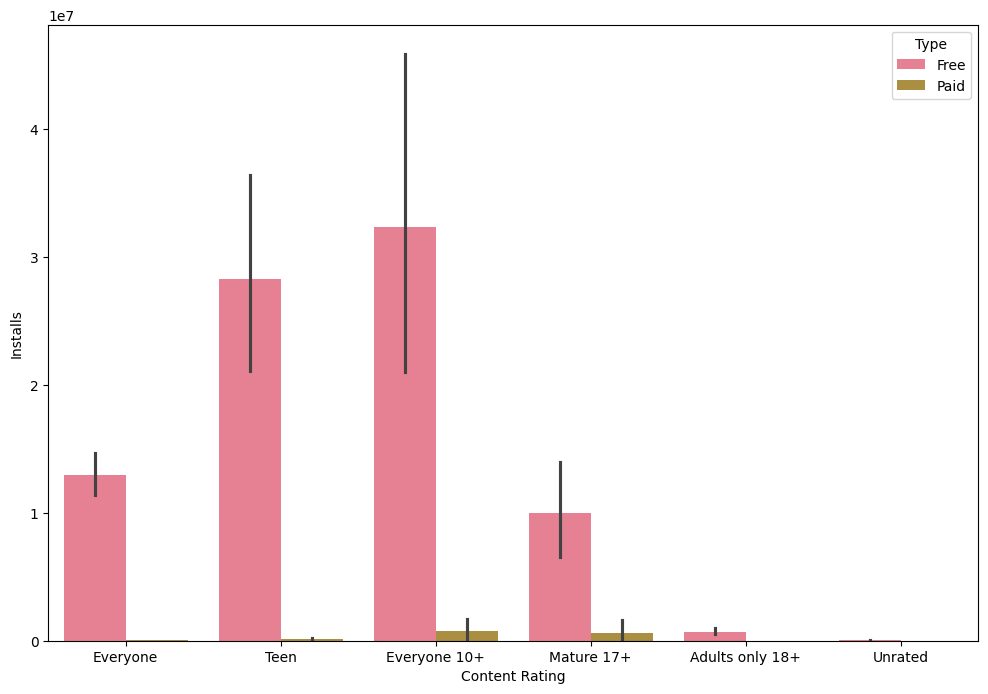

In [153]:
plt.figure(figsize=(12,8))
sns.barplot(x="Content Rating", y="Installs", hue="Type", data=df)


## Genres Column

In [173]:
df['Genres'].value_counts()

Genres
Tools                                841
Entertainment                        588
Education                            527
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: count, Length: 119, dtype: int64


## Current ver Column

In [174]:
df['Current Ver'].value_counts()

Current Ver
Varies with device    1310
1.0                    802
1.1                    260
1.2                    177
2.0                    149
                      ... 
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
7.1.34.28                1
2.0.148.0                1
Name: count, Length: 2831, dtype: int64


## Android Ver Column

In [175]:
df['Android Ver'].value_counts()


Android Ver
4.1 and up            2381
4.0.3 and up          1451
4.0 and up            1337
Varies with device    1221
4.4 and up             893
2.3 and up             643
5.0 and up             546
4.2 and up             387
2.3.3 and up           279
2.2 and up             239
3.0 and up             237
4.3 and up             235
2.1 and up             133
1.6 and up             116
6.0 and up              58
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: count, dtype: int64

In [176]:
# Function to create a scatter plot
def scatters(col1, col2):
    # Create a scatter plot using Seaborn
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    sns.scatterplot(data=df, x=col1, y=col2, hue="Type")
    plt.title(f'Scatter Plot of {col1} vs {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

# Function to create a KDE plot
def kde_plot(feature):
    # Create a FacetGrid for KDE plots using Seaborn
    grid = sns.FacetGrid(df, hue="Type", aspect=2)

    # Map KDE plots for the specified feature
    grid.map(sns.kdeplot, feature)

    # Add a legend to distinguish between categories
    grid.add_legend()


## kde-Plot Analysis

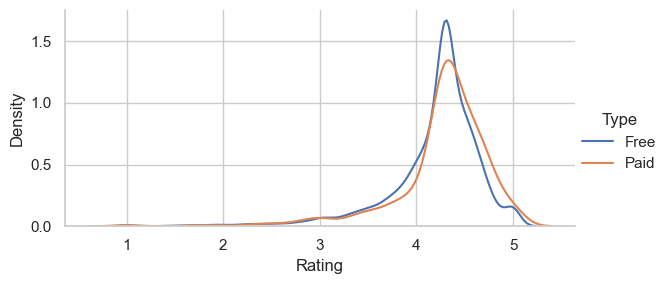

In [177]:
kde_plot('Rating')

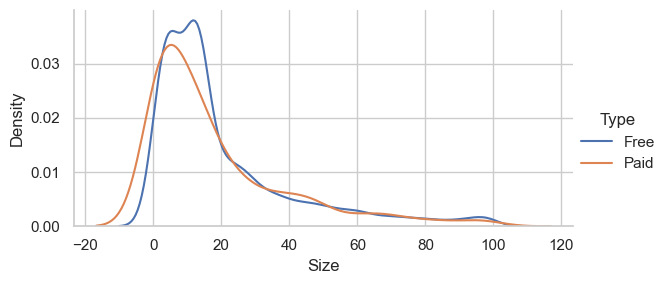

In [178]:
kde_plot('Size')

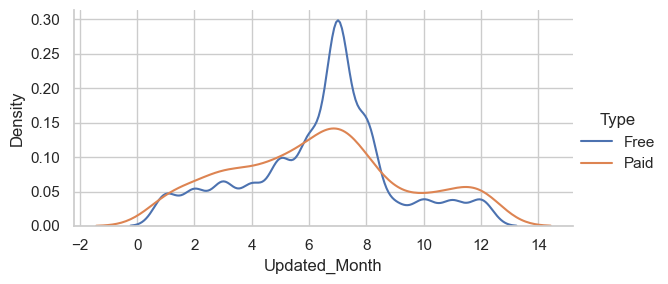

In [179]:
kde_plot('Updated_Month')

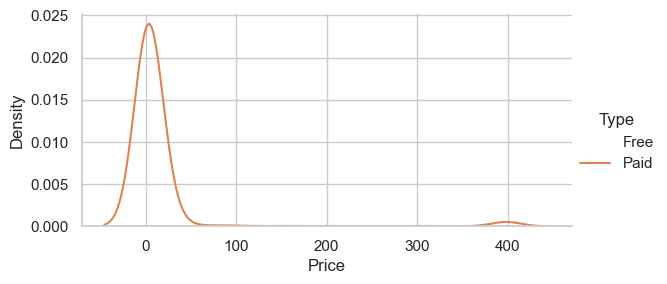

In [180]:
kde_plot('Price')

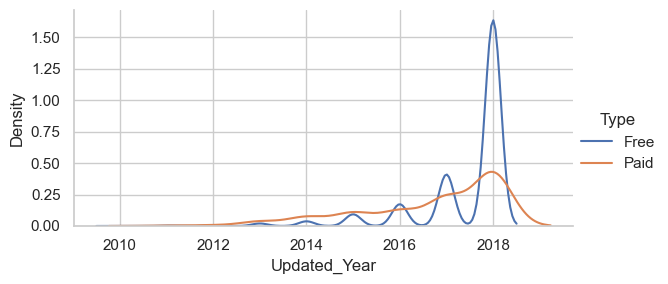

In [181]:
kde_plot('Updated_Year')


## Scatter plot Analysis

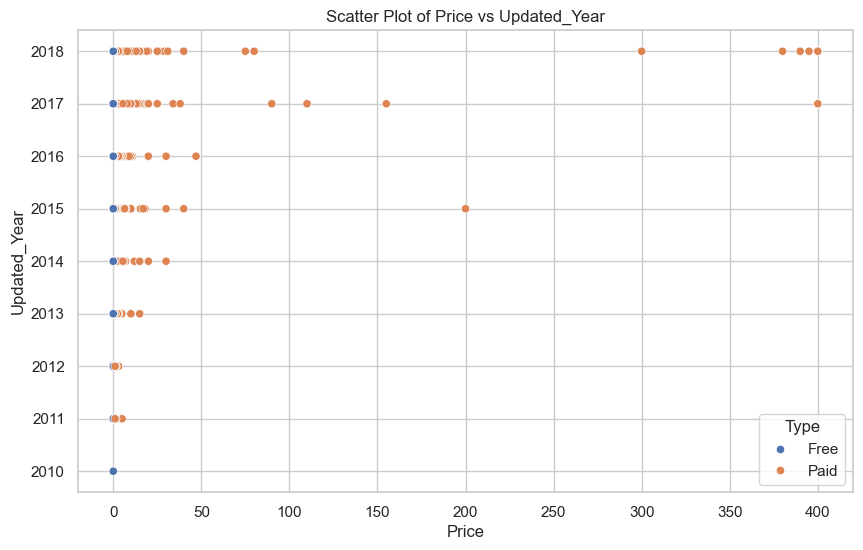

In [182]:
scatters('Price', 'Updated_Year')

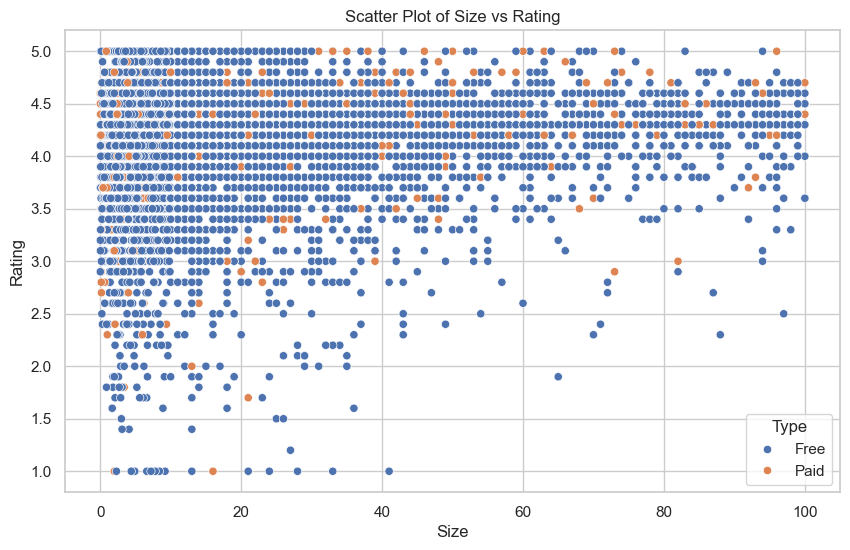

In [183]:
scatters('Size', 'Rating')

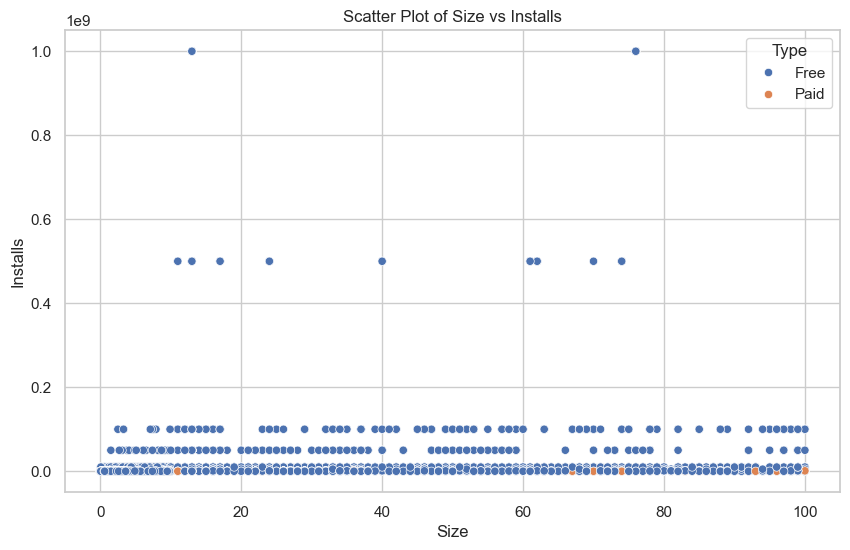

In [184]:
scatters('Size', 'Installs')

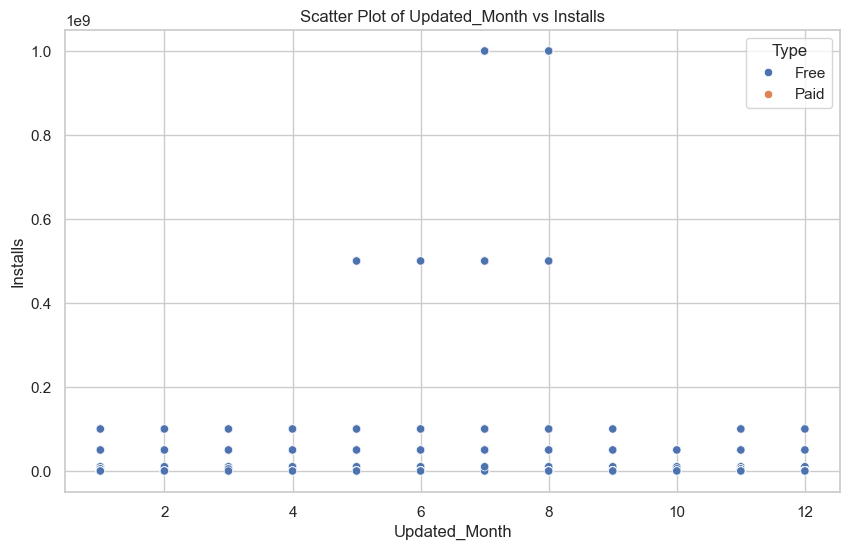

In [185]:
scatters('Updated_Month', 'Installs')

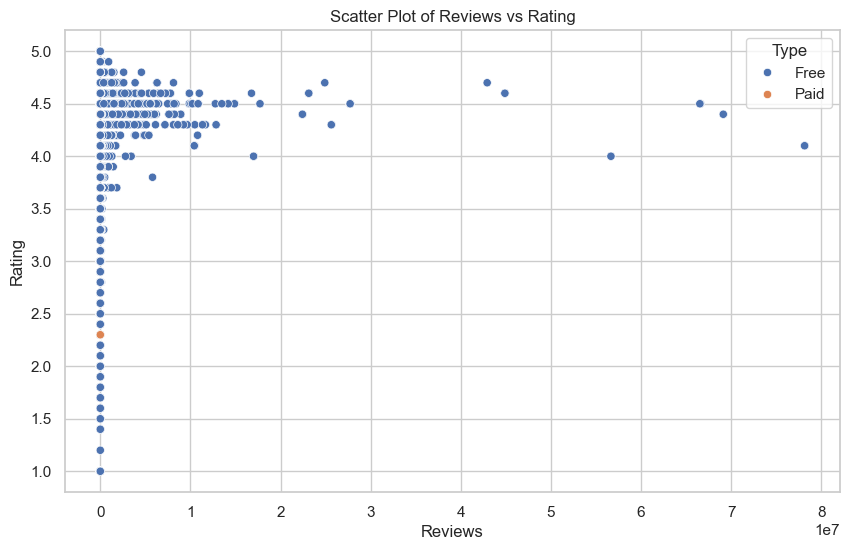

In [186]:
scatters('Reviews', 'Rating')

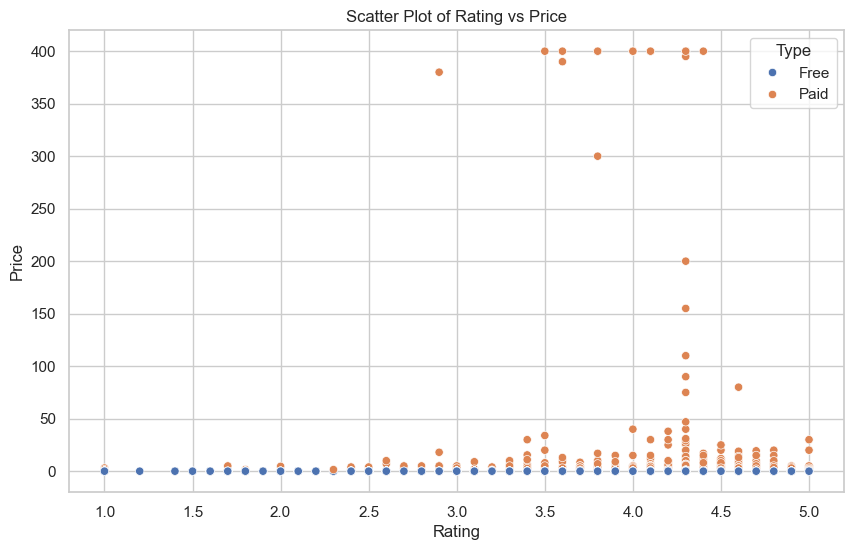

In [187]:
scatters('Rating', 'Price')

## Further Analysis

### Apps with a 5.0 Rating

In [188]:
df_rating_5 = df[df.Rating == 5.]
print(f'There are {df_rating_5.shape[0]} apps having rating of 5.0')

There are 271 apps having rating of 5.0


### Installs

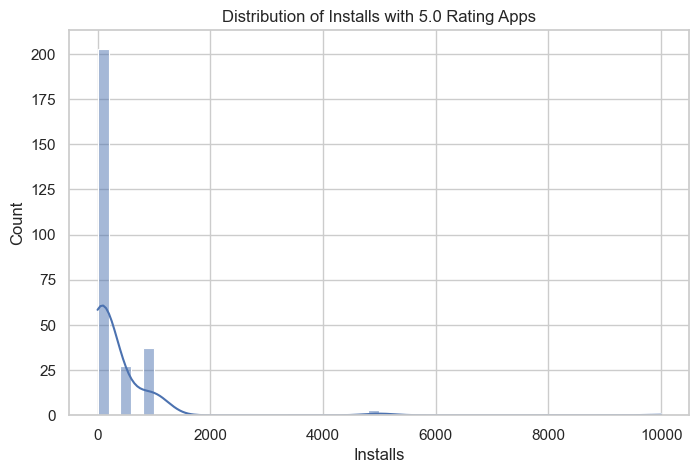

In [189]:
sns.histplot(data=df_rating_5, x='Installs', kde=True, bins=50)

plt.title('Distribution of Installs with 5.0 Rating Apps')
plt.show()

**Despite the full ratings, the number of installations for the majority of the apps is low. Hence, those apps cannot be considered the best products.**


### Reviews

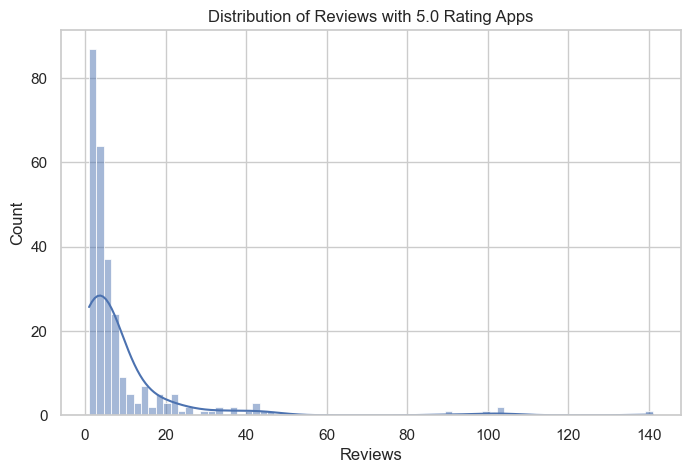

In [190]:
sns.histplot(data=df_rating_5, x='Reviews', kde=True)
plt.title('Distribution of Reviews with 5.0 Rating Apps')
plt.show()

**The distribution is right-skewed which shows applications with few reviews having 5.0 ratings, which is misleading.**


### Category

In [191]:
df_rating_5_cat =  df_rating_5['Category'].value_counts().reset_index()

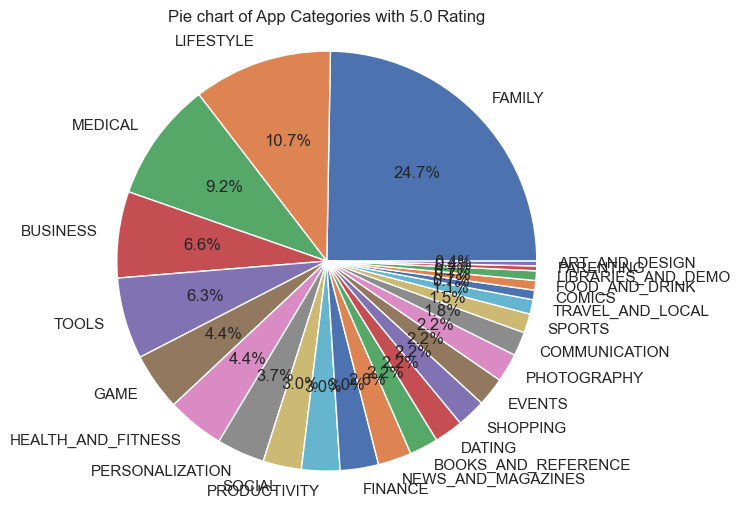

In [192]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
plt.pie(df_rating_5_cat.iloc[:, 1], labels=df_rating_5_cat.iloc[:, 0], autopct='%1.1f%%')
plt.title('Pie chart of App Categories with 5.0 Rating')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()

**Family, LifeStyle and Medical apps receive the most 5.0 ratings on Google Play Store with Family representing about quater of whole.**

### Type

In [193]:
df_rating_5_type =  df_rating_5['Type'].value_counts().reset_index()

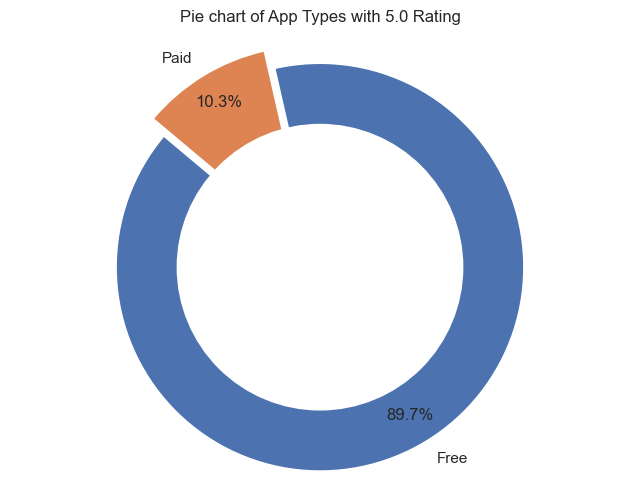

In [194]:
# Create a pie chart
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Data for the pie chart
sizes = df_rating_5_type.iloc[:, 1]
labels = df_rating_5_type.iloc[:, 0]

# Pull a slice out by exploding it
explode = (0, 0.1)  # Adjust the second value to control the pull-out distance

# Create the pie chart with default colors
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, pctdistance=0.85, explode=explode)

# Draw a circle in the center to make it look like a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Title
plt.title('Pie chart of App Types with 5.0 Rating')

# Show the pie chart
plt.show()


**Almost 90% of the 5.0 rating apps are free on Goolge Play Store.**

Text(0.5, 1.0, 'Time series plot of Last Updates')

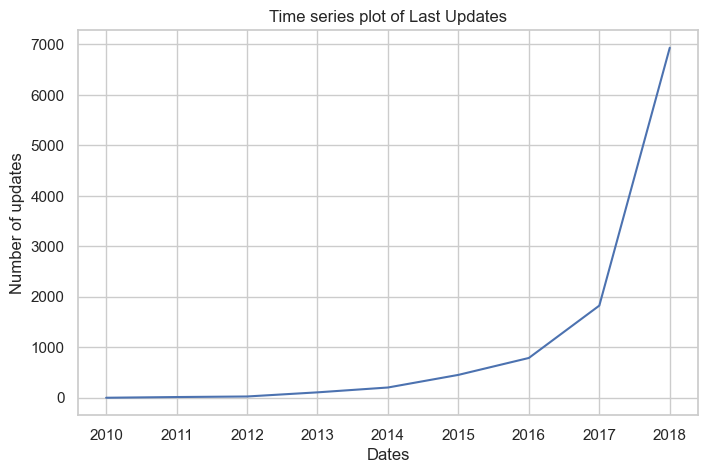

In [195]:
# Time Series Plot of Last Updates
freq= pd.Series()
freq=df['Updated_Year'].value_counts()
freq.plot()
plt.xlabel("Dates")
plt.ylabel("Number of updates")
plt.title("Time series plot of Last Updates")

Feature Pruning

We decide to prune the following features:

* App : App names are of no value for the model
* Genres : The informations it stores is same as the feature Category
* Current Ver : Current Version of an app doesn't hold significant value.
* Android Ver: Android Version of an app doesn't hold significant value.

In [196]:
pruned_features = ['App', 'Genres', 'Current Ver', 'Android Ver']

Step 6 | Data Splitting for Modeling

    
### We split the dataset into 80% train and 20% test.

In [450]:
target = 'Rating'

In [451]:
X = df.copy().drop(pruned_features+[target], axis=1)
y = df.copy()[target]

In [452]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


## Label Encoding

In [453]:
le_dict = defaultdict()

In [454]:
features_to_encode = X_train.select_dtypes(include=['category', 'object']).columns

for col in features_to_encode:
    le = LabelEncoder()

    X_train[col] = le.fit_transform(X_train[col]) # Fitting and tranforming the Train data
    X_train[col] = X_train[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    X_test[col] = le.transform(X_test[col]) # Only transforming the test data
    X_test[col] = X_test[col].astype('category') # Converting the label encoded features from numerical back to categorical dtype in pandas

    le_dict[col] = le # Saving the label encoder for individual features


## Standardization

In [455]:
# Converting and adding "Last Updated Month" to categorical features
categorical_features = features_to_encode + ['Updated_Month']
X_train['Updated_Month'] = X_train['Updated_Month'].astype('category')
X_test['Updated_Month'] = X_test['Updated_Month'].astype('category')

# Listing numeric features to scale
numeric_features = X_train.select_dtypes(exclude=['category', 'object']).columns

In [456]:
numeric_features

Index(['Reviews', 'Size', 'Installs', 'Price', 'Updated_Year'], dtype='object')

In [457]:
scaler = StandardScaler()

# Fitting and transforming the Training data
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
# X_train = scaler.fit_transform(X_train)

# Only transforming the Test data
X_test[numeric_features] = scaler.transform(X_test[numeric_features])
# X_test = scaler.transform(X_test)

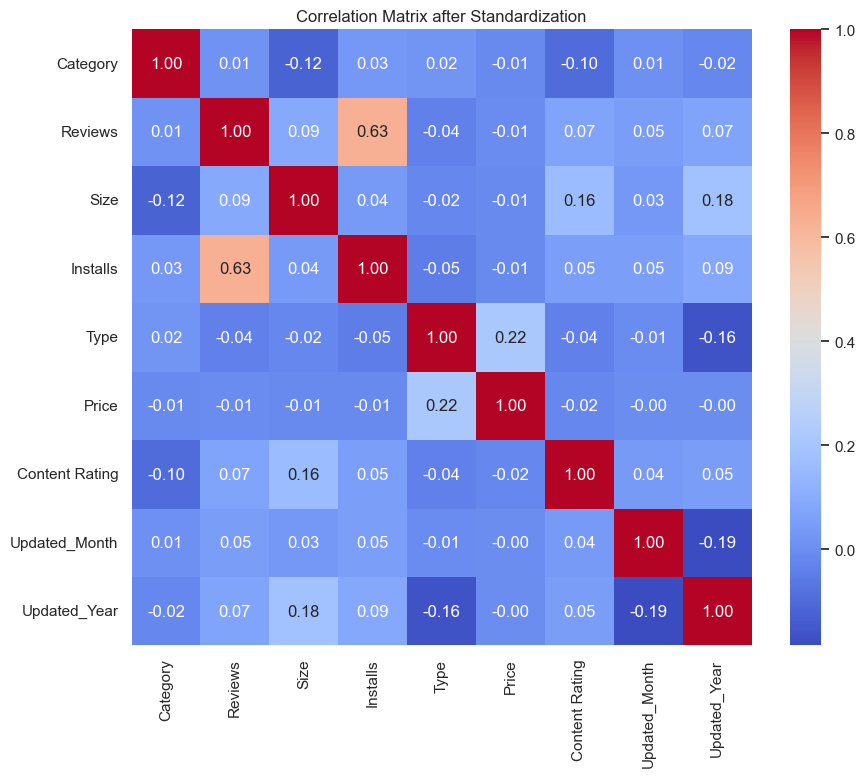

In [458]:
# Assuming X_train is your standardized training data
correlation_matrix = X_train.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix after Standardization')
plt.show()

Step 7 | Modeling

Regression


    
### Creating dataframe for metrics

In [459]:
models = ['Linear', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['RMSE', 'MAE', 'R2']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])

df_metrics_reg = pd.DataFrame(index=multi_index,
                          columns=['value'])

In [460]:
df_metrics_reg

value
model         dataset metric      
Linear        train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
KNN           train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN
Random Forest train   RMSE     NaN
                      MAE      NaN
                      R2       NaN
              test    RMSE     NaN
                      MAE      NaN
                      R2       NaN


## Linear Regressor

In [461]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [462]:
df_metrics_reg.loc['Linear', 'train', 'R2'] = lr.score(X_train, y_train)
df_metrics_reg.loc['Linear', 'test', 'R2'] = lr.score(X_test, y_test)

In [463]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

df_metrics_reg.loc['Linear', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Linear', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Linear', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Linear', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)


### KNeighbors Regressor

In [464]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [465]:
df_metrics_reg.loc['KNN', 'train', 'R2'] = knn.score(X_train, y_train)
df_metrics_reg.loc['KNN', 'test', 'R2'] = knn.score(X_test, y_test)

In [466]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

df_metrics_reg.loc['KNN', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['KNN', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['KNN', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['KNN', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)


### Random Forest Regressor

In [467]:
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [468]:
df_metrics_reg.loc['Random Forest', 'train', 'R2'] = rf.score(X_train, y_train)
df_metrics_reg.loc['Random Forest', 'test', 'R2'] = rf.score(X_test, y_test)

In [469]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

df_metrics_reg.loc['Random Forest', 'train', 'MAE'] = mean_absolute_error(y_train, y_train_pred)
df_metrics_reg.loc['Random Forest', 'test', 'MAE'] = mean_absolute_error(y_test, y_test_pred)

df_metrics_reg.loc['Random Forest', 'train', 'RMSE'] = mean_squared_error(y_train, y_train_pred, squared=False)
df_metrics_reg.loc['Random Forest', 'test', 'RMSE'] = mean_squared_error(y_test, y_test_pred, squared=False)

  
### Regression Evaluation

In [470]:
# Rounding the values

df_metrics_reg['value'] = df_metrics_reg['value'].apply(lambda v: round(v, ndigits=3))
df_metrics_reg

value
model         dataset metric       
Linear        train   RMSE    0.478
                      MAE     0.319
                      R2      0.023
              test    RMSE    0.483
                      MAE     0.327
                      R2      0.037
KNN           train   RMSE    0.409
                      MAE     0.280
                      R2      0.286
              test    RMSE    0.510
                      MAE     0.349
                      R2     -0.072
Random Forest train   RMSE    0.468
                      MAE     0.309
                      R2      0.063
              test    RMSE    0.472
                      MAE     0.314
                      R2      0.081

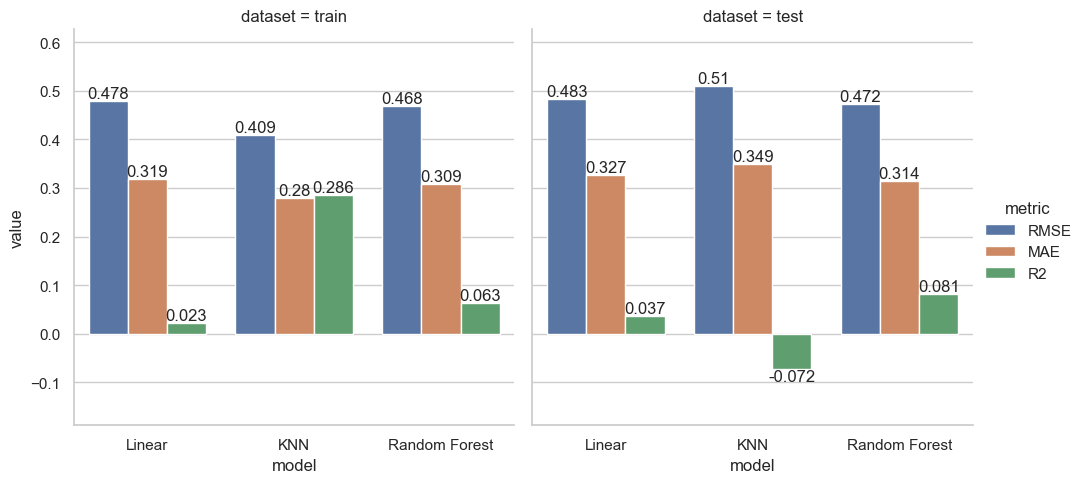

In [471]:
data = df_metrics_reg.reset_index()

g = sns.catplot(col='dataset', data=data, kind='bar', x='model', y='value', hue='metric')

# Adding annotations to bars
# iterate through axes
for ax in g.axes.ravel():
    # add annotations
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')

    ax.margins(y=0.2)

plt.show()


    
* **The Regression predictions don't hold up very well!**

* **We can interpret that the dataset is not suitable for regression problem.**


## Classification


### Let's frame it as a classification problem statement.

### Converting the Rating from continuous to discrete

In [472]:
y_train_int = y_train.astype(int)
y_test_int = y_test.astype(int)


    
### Creating dataframe for metrics

In [473]:
# Create a MultiIndex for the DataFrame
models = ['Logistic Regression', 'KNN', 'Random Forest']
datasets = ['train', 'test']
metrics = ['accuracy %', 'precision', 'recall', 'f1']

multi_index = pd.MultiIndex.from_product([models, datasets, metrics],
                                         names=['model', 'dataset', 'metric'])


In [474]:
# Create an empty DataFrame with the MultiIndex
df_metrics_clf = pd.DataFrame(index=multi_index, columns=['value'])

In [475]:
# Check for class imbalance
train_rating_distribution = y_train_int.value_counts(normalize=True)
test_rating_distribution = y_test_int.value_counts(normalize=True)


In [476]:
print("Training Set Rating Distribution:")
print(train_rating_distribution)


Training Set Rating Distribution:
Rating
4    0.789594
3    0.158740
5    0.025350
2    0.020884
1    0.005432
Name: proportion, dtype: float64


In [477]:
print("\nTest Set Rating Distribution:")
print(test_rating_distribution)



Test Set Rating Distribution:
Rating
4    0.771718
3    0.168919
5    0.029440
2    0.025097
1    0.004826
Name: proportion, dtype: float64


In [478]:
# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_int), y=y_train_int)

In [479]:
# Logistic Regression Classifier
lr_clf = LogisticRegression(class_weight='balanced')
lr_clf.fit(X_train, y_train_int)


LogisticRegression(class_weight='balanced')

In [480]:
# Update the DataFrame for accuracy
df_metrics_clf.loc[('Logistic Regression', 'train', 'accuracy %'), 'value'] = lr_clf.score(X_train, y_train_int) * 100
df_metrics_clf.loc[('Logistic Regression', 'test', 'accuracy %'), 'value'] = lr_clf.score(X_test, y_test_int) * 100


In [481]:
# Precision, Recall, and F1 Score for Logistic Regression
y_train_pred_lr = lr_clf.predict(X_train)
y_test_pred_lr = lr_clf.predict(X_test)

precision_train_lr = precision_score(y_train_int, y_train_pred_lr, average='weighted') * 100
precision_test_lr = precision_score(y_test_int, y_test_pred_lr, average='weighted') * 100

recall_train_lr = recall_score(y_train_int, y_train_pred_lr, average='weighted') * 100
recall_test_lr = recall_score(y_test_int, y_test_pred_lr, average='weighted') * 100

f1_train_lr = f1_score(y_train_int, y_train_pred_lr, average='weighted') * 100
f1_test_lr = f1_score(y_test_int, y_test_pred_lr, average='weighted') * 100


In [482]:
# Update the DataFrame for precision, recall, and F1 score
df_metrics_clf.loc[('Logistic Regression', 'train', 'precision'), 'value'] = precision_train_lr
df_metrics_clf.loc[('Logistic Regression', 'test', 'precision'), 'value'] = precision_test_lr

df_metrics_clf.loc[('Logistic Regression', 'train', 'recall'), 'value'] = recall_train_lr
df_metrics_clf.loc[('Logistic Regression', 'test', 'recall'), 'value'] = recall_test_lr

df_metrics_clf.loc[('Logistic Regression', 'train', 'f1'), 'value'] = f1_train_lr
df_metrics_clf.loc[('Logistic Regression', 'test', 'f1'), 'value'] = f1_test_lr


In [483]:
# KNN Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train_int)


KNeighborsClassifier()

In [484]:
# Update the DataFrame for accuracy
df_metrics_clf.loc[('KNN', 'train', 'accuracy %'), 'value'] = knn_clf.score(X_train, y_train_int) * 100
df_metrics_clf.loc[('KNN', 'test', 'accuracy %'), 'value'] = knn_clf.score(X_test, y_test_int) * 100


In [485]:
# Precision, Recall, and F1 Score for KNN
y_train_pred_knn = knn_clf.predict(X_train)
y_test_pred_knn = knn_clf.predict(X_test)

precision_train_knn = precision_score(y_train_int, y_train_pred_knn, average='weighted') * 100
precision_test_knn = precision_score(y_test_int, y_test_pred_knn, average='weighted') * 100

recall_train_knn = recall_score(y_train_int, y_train_pred_knn, average='weighted') * 100
recall_test_knn = recall_score(y_test_int, y_test_pred_knn, average='weighted') * 100

f1_train_knn = f1_score(y_train_int, y_train_pred_knn, average='weighted') * 100
f1_test_knn = f1_score(y_test_int, y_test_pred_knn, average='weighted') * 100


In [486]:
# Update the DataFrame for precision, recall, and F1 score
df_metrics_clf.loc[('KNN', 'train', 'precision'), 'value'] = precision_train_knn
df_metrics_clf.loc[('KNN', 'test', 'precision'), 'value'] = precision_test_knn

df_metrics_clf.loc[('KNN', 'train', 'recall'), 'value'] = recall_train_knn
df_metrics_clf.loc[('KNN', 'test', 'recall'), 'value'] = recall_test_knn

df_metrics_clf.loc[('KNN', 'train', 'f1'), 'value'] = f1_train_knn
df_metrics_clf.loc[('KNN', 'test', 'f1'), 'value'] = f1_test_knn


In [487]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150,200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
# Fit the grid search to the data
grid_search.fit(X_train, y_train_int)

# Print the best parameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf = grid_search.best_estimator_

# Evaluate on training set
train_predictions = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train_int, train_predictions)
train_precision = precision_score(y_train_int, train_predictions, average='weighted')
train_recall = recall_score(y_train_int, train_predictions, average='weighted')
train_f1 = f1_score(y_train_int, train_predictions, average='weighted')

# Evaluate on test set
test_predictions = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test_int, test_predictions)
test_precision = precision_score(y_test_int, test_predictions, average='weighted')
test_recall = recall_score(y_test_int, test_predictions, average='weighted')
test_f1 = f1_score(y_test_int, test_predictions, average='weighted')

print(f'Training Accuracy (Tuned): {train_accuracy}')
print(f'Training Precision (Tuned): {train_precision}')
print(f'Training Recall (Tuned): {train_recall}')
print(f'Training F1 Score (Tuned): {train_f1}')

print(f'Test Accuracy (Tuned): {test_accuracy}')
print(f'Test Precision (Tuned): {test_precision}')
print(f'Test Recall (Tuned): {test_recall}')
print(f'Test F1 Score (Tuned): {test_f1}')

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Training Accuracy (Tuned): 0.8349830999517142
Training Precision (Tuned): 0.8268175042775675
Training Recall (Tuned): 0.8349830999517142
Training F1 Score (Tuned): 0.7880559561185819
Test Accuracy (Tuned): 0.7765444015444015
Test Precision (Tuned): 0.706450817261628
Test Recall (Tuned): 0.7765444015444015
Test F1 Score (Tuned): 0.6936858020646786


In [488]:
# Random Forest Classifier
rf_clf = RandomForestClassifier(class_weight=dict(zip(np.unique(y_train_int), class_weights)))
rf_clf.fit(X_train, y_train_int)


RandomForestClassifier(class_weight={1: 36.81777777777778, 2: 9.576878612716763,
                                     3: 1.2599239543726235,
                                     4: 0.253294603271671,
                                     5: 7.889523809523809})

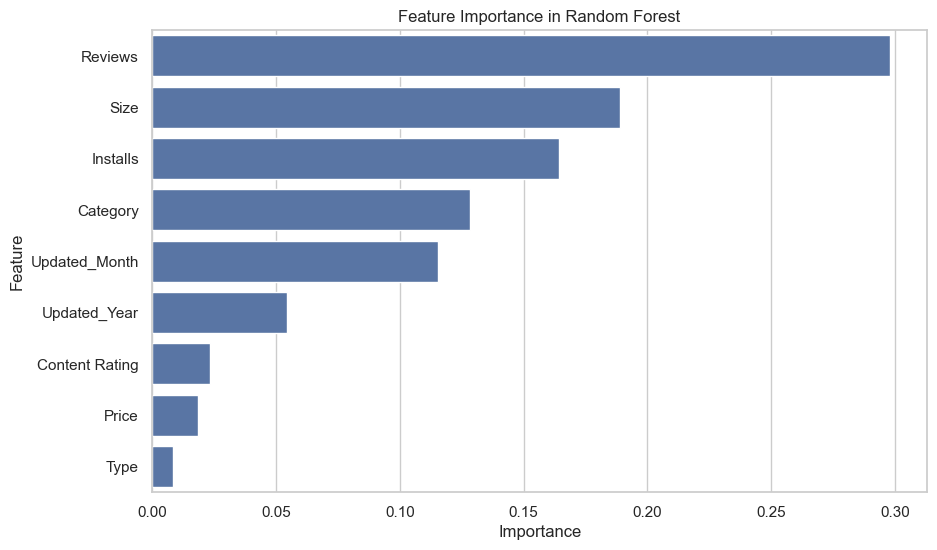

In [497]:
feature_importance = rf_clf.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance in Random Forest')
plt.show()

In [498]:
# Update the DataFrame for accuracy
df_metrics_clf.loc[('Random Forest', 'train', 'accuracy %'), 'value'] = rf_clf.score(X_train, y_train_int) * 100
df_metrics_clf.loc[('Random Forest', 'test', 'accuracy %'), 'value'] = rf_clf.score(X_test, y_test_int) * 100


In [499]:
# Precision, Recall, and F1 Score for Random Forest
y_train_pred_rf = rf_clf.predict(X_train)
y_test_pred_rf = rf_clf.predict(X_test)

precision_train_rf = precision_score(y_train_int, y_train_pred_rf, average='weighted') * 100
precision_test_rf = precision_score(y_test_int, y_test_pred_rf, average='weighted') * 100

recall_train_rf = recall_score(y_train_int, y_train_pred_rf, average='weighted') * 100
recall_test_rf = recall_score(y_test_int, y_test_pred_rf, average='weighted') * 100

f1_train_rf = f1_score(y_train_int, y_train_pred_rf, average='weighted') * 100
f1_test_rf = f1_score(y_test_int, y_test_pred_rf, average='weighted') * 100



In [500]:
# Update the DataFrame for precision, recall, and F1 score
df_metrics_clf.loc[('Random Forest', 'train', 'precision'), 'value'] = precision_train_rf
df_metrics_clf.loc[('Random Forest', 'test', 'precision'), 'value'] = precision_test_rf

df_metrics_clf.loc[('Random Forest', 'train', 'recall'), 'value'] = recall_train_rf
df_metrics_clf.loc[('Random Forest', 'test', 'recall'), 'value'] = recall_test_rf

df_metrics_clf.loc[('Random Forest', 'train', 'f1'), 'value'] = f1_train_rf
df_metrics_clf.loc[('Random Forest', 'test', 'f1'), 'value'] = f1_test_rf


In [501]:
# Rounding and converting to percentages
df_metrics_clf['value'] = df_metrics_clf['value'].apply(lambda v: round(v, ndigits=2))
df_metrics_clf

value
model               dataset metric            
Logistic Regression train   accuracy %   26.94
                            precision    75.71
                            recall       26.94
                            f1           36.95
                    test    accuracy %   27.32
                            precision    74.70
                            recall       27.32
                            f1           37.86
KNN                 train   accuracy %   80.98
                            precision    77.67
                            recall       80.98
                            f1           77.38
                    test    accuracy %   74.52
                            precision    66.02
                            recall       74.52
                            f1           69.30
Random Forest       train   accuracy %  100.00
                            precision   100.00
                            recall      100.00
                            f1          100.00
                    test    accuracy %   77.85
                            precision    71.91
                            recall       77.85
                            f1           71.20

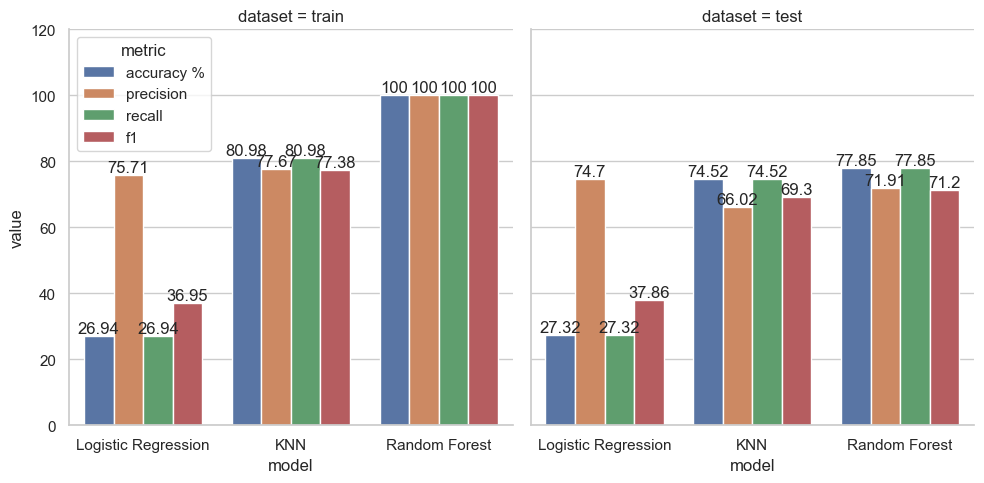

In [502]:
# Visualizing classification metrics
data_clf = df_metrics_clf.reset_index()
g_clf = sns.catplot(col='dataset', data=data_clf, kind='bar', x='model', y='value', hue='metric', legend_out=False)

for ax in g_clf.axes.ravel():
    for c in ax.containers:
        ax.bar_label(c, label_type='edge')
    ax.margins(y=0.2)

plt.show()

In [496]:
# Example Summary (customized for predicting mobile app ratings)
from sklearn.metrics import accuracy_score, mean_squared_error


# Regression Baseline: Predicting the mean rating
regression_baseline_rmse = mean_squared_error(y_train, [y_train.mean()] * len(y_train), squared=False)

# Classification Baseline: Predicting the majority class
majority_class = y_train_int.mode().values[0]
classification_baseline_accuracy = accuracy_score(y_train_int, [majority_class] * len(y_train_int))

# Compare Regression Models to Baseline
for model in ['Linear', 'KNN', 'Random Forest']:
    train_rmse = df_metrics_reg.loc[model, 'train', 'RMSE']
    test_rmse = df_metrics_reg.loc[model, 'test', 'RMSE']
    print(f"{model} Model - Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")

# Compare Classification Models to Baseline
for model in ['Logistic Regression', 'KNN', 'Random Forest']:
    train_accuracy = df_metrics_clf.loc[model, 'train', 'accuracy %']
    test_accuracy = df_metrics_clf.loc[model, 'test', 'accuracy %']
    print(f"{model} Model - Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")

print(f"Regression Baseline RMSE: {regression_baseline_rmse}")
print(f"Classification Baseline Accuracy: {classification_baseline_accuracy}")


Linear Model - Train RMSE: value    0.478
Name: (Linear, train, RMSE), dtype: float64, Test RMSE: value    0.483
Name: (Linear, test, RMSE), dtype: float64
KNN Model - Train RMSE: value    0.409
Name: (KNN, train, RMSE), dtype: float64, Test RMSE: value    0.51
Name: (KNN, test, RMSE), dtype: float64
Random Forest Model - Train RMSE: value    0.468
Name: (Random Forest, train, RMSE), dtype: float64, Test RMSE: value    0.472
Name: (Random Forest, test, RMSE), dtype: float64
Logistic Regression Model - Train Accuracy: value    26.94
Name: (Logistic Regression, train, accuracy %), dtype: float64, Test Accuracy: value    27.32
Name: (Logistic Regression, test, accuracy %), dtype: float64
KNN Model - Train Accuracy: value    80.98
Name: (KNN, train, accuracy %), dtype: float64, Test Accuracy: value    74.52
Name: (KNN, test, accuracy %), dtype: float64
Random Forest Model - Train Accuracy: value    100.0
Name: (Random Forest, train, accuracy %), dtype: float64, Test Accuracy: value    77.8

## After comparing with Regression models, its clear that we would get better results from Classification!


## Conclusion



* In conclusion, the dataset from Google Play Store apps has been explored and analyzed using various data visualization techniques with the help of Matplotlib, Seaborn and Plotly libraries.

* The preliminary analysis, visualization methods and EDA provided insights into the data and helped in understanding the underlying patterns and relationships among the variables.

* The analysis of the Google Play Store dataset has shown that there is a weak correlation between the rating and other app attributes such as size, installs, reviews, and price. We found that there was a moderate positive correlation between the number of installs and the rating, suggesting that higher-rated apps tend to have more installs.

* We also observed that free apps have higher ratings than paid apps, and that app size does not seem to have a significant impact on rating.